In [1]:
import tensorflow as tf
# È†êË®≠ÊÉÖÊ≥Å‰∏ãÔºåtensorflowÊúÉÁÇ∫‰∫ÜÈÅøÂÖçÁ¢éÁâáÂåñÁöÑË®òÊÜ∂È´îÈÄ†ÊàêÊïàËÉΩ‰∏ç‰Ω≥ÁöÑÊÉÖÊ≥ÅËÄå‰∏ÄÊ¨°ÊÄßÁöÑ‰ΩîÁî®È°ØÂç°ÊâÄÊúâË®òÊÜ∂È´îÔºå
# ÈÄôÈÉ®‰ªΩÂèØ‰ª•ÈÄèÈÅétf.config‰æÜÈôêÂà∂Á°¨È´îË≥áÊ∫ê‰ª•ÂèäÊåáÂÆöÈ°ØÂç°Ë®òÊÜ∂È´îÁöÑ‰ΩøÁî®„ÄÇ
def select_gpu(N):
    gpus = tf.config.experimental.list_physical_devices('GPU')
    print(gpus)
    if gpus:
        try:
            for gpu in gpus:
                # If memory growth is enabled for a PhysicalDevice, 
                # the runtime initialization will not allocate all memory on the device. 
                # Memory growth cannot be configured on a PhysicalDevice with virtual devices configured.
                tf.config.experimental.set_memory_growth(gpu, True)
            # ÊåáÂÆö‰ΩøÁî®Âì™È°ÜGPU
            tf.config.experimental.set_visible_devices(gpus[N], 'GPU')
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        except RuntimeError as e:
            print(e)

In [2]:
select_gpu(0)
epochs = 5
model_name = 'bert-base'
sequence_length = 48
batch_size = 512

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU')]
3 Physical GPUs, 1 Logical GPUs


In [3]:
import pandas as pd
import numpy as np
import json

In [4]:
data_path = '/home/Danny/Data-Mining/lab2/kaggle/data/'

In [5]:
json_list = list()
with open(data_path + 'tweets_DM.json' , 'r') as file:
    for line in file:
        json_list.append(json.loads(line))

In [6]:
tweet_list = list()
for json in json_list:
    tweet_id = json['_source']['tweet']['tweet_id']
    hashtags = json['_source']['tweet']['hashtags']
    hashtag = ' '.join(hashtags)
    text = json['_source']['tweet']['text']
#     text = text + ' ' + hashtag
    tweet_list.append([tweet_id, text])

In [7]:
emotion_df = pd.read_csv(data_path + 'emotion.csv')
emotion_df

tweet_id       emotion
0        0x3140b1       sadness
1        0x368b73       disgust
2        0x296183  anticipation
3        0x2bd6e1           joy
4        0x2ee1dd  anticipation
...           ...           ...
1455558  0x38dba0           joy
1455559  0x300ea2           joy
1455560  0x360b99          fear
1455561  0x22eecf           joy
1455562  0x2fb282  anticipation

[1455563 rows x 2 columns]

In [8]:
identification_df = pd.read_csv(data_path + 'data_identification.csv')
identification_df

tweet_id identification
0        0x28cc61           test
1        0x29e452          train
2        0x2b3819          train
3        0x2db41f           test
4        0x2a2acc          train
...           ...            ...
1867530  0x227e25          train
1867531  0x293813          train
1867532  0x1e1a7e          train
1867533  0x2156a5          train
1867534  0x2bb9d2          train

[1867535 rows x 2 columns]

In [9]:
emoji_dict = {
    "üòÇ": "lolface",
    "üòá": "smile",
    "üòÄ": "smile",
    "üéâ": "party",
    "üò≥": "embarrassed",
    "üòî": "sadface",
    "üëÄ": "shifty",
    "ü§∑": "shrugging",
    "üíî": "brokenhearted",
    "üëª": "ghost",
    "üòç": "heart",
    "üôÑ": "disdain",
    "üíñ": "heart",
    "‚úå": "victory",
    "üé∂": "music",
    "üò±": "shock",
    "üòÉ": "smile",
    "üòí": "unsatisfied",
    "üëä": "brofist",
    "üòÑ": "smile",
    "üåû": "smile",
    "üôå": "celebration",
    "üòÅ": "smile",
    "ü§ó": "hugging",
    "ü§£": "rofl",
    "üåà": "gaypride",
    "üòâ": "winking",
    "üíû": "heart",
    "üôÉ": "irony",
    "üòú": "winking",
    "üò≠": "bawling",
    "ü§î": "thinker",
    "üòé": "cool",
    "üíõ": "heart",
    "üíö": "heart",
    "üíÉ": "fun",
    "üíó": "heart",
    "üò¨": "awkward",
    "üòå": "relieved",
    "üòÖ": "whew",
    "üíã": "kiss",
    "üôà": "laugh",
    "üòä": "^^",
    "üëå": "okay",
    "üò°": "angry",
    "üòò": "kiss",
    "üò©": "weary",
    "üî•": "excellent",
    "üíô": "heart",
    "üíï": "heart",
    "üëè": "clapping",
    "üëç": "thumbsup",
    "üíØ": "perfect",
    "üíú": "heart",
    "üïò" : "late",
    "üò°" : "angry",
    "üòí" : "dissatisfied",
    "üò§" : "angry",
    "üò†" : "angry",
    "üòë" : "annoy",
    "üò∞": "anxious",
    "üòØ": "surprise",
    "üò®": "scared",
    "üò≤": "astonished",
    "üí™": "strong",
    "ü§¶": "facepalm",
    "‚ú®": "sparkle",
    "üò¢": "crying",
    "üíì": "heart",
    "üëë": "crown",
    "ü§ò": "rockon",
    "üåπ": "rose",
    "üòã": "delicious",
    "üòè": "flirting",
    "üòÜ": "XD",
    "üò´": "exhausted",
    "üò¶": "frowning",
    "üôè": "please",
}

In [10]:
frequent_name_dict = {
    "#realdonaldtrump": "sadness",
    "#fifthharmony": "sadness",
    "#mostrequestlive": "sadness",
    "#onairromeo": "sadness",
    "#matthardybrand": "sadness",
}

In [11]:
text_df = pd.DataFrame(tweet_list, columns=['tweet_id', 'text'])
text_df

tweet_id                                               text
0        0x376b20  People who post "add me on #Snapchat" must be ...
1        0x2d5350  @brianklaas As we see, Trump is dangerous to #...
2        0x28b412  Confident of your obedience, I write to you, k...
3        0x1cd5b0                Now ISSA is stalking Tasha üòÇüòÇüòÇ <LH>
4        0x2de201  "Trust is not the same as faith. A friend is s...
...           ...                                                ...
1867530  0x316b80  When you buy the last 2 tickets remaining for ...
1867531  0x29d0cb  I swear all this hard work gone pay off one da...
1867532  0x2a6a4f  @Parcel2Go no card left when I wasn't in so I ...
1867533  0x24faed  Ah, corporate life, where you can date <LH> us...
1867534  0x34be8c             Blessed to be living #Sundayvibes <LH>

[1867535 rows x 2 columns]

In [12]:
# import re
# def replace_word(text):
#     text_list = text.split()
#     for i, j in enumerate(text_list):
#         if j in emoji_dict:
#             text_list[i] = emoji_dict[j]
#         if j in frequent_name_dict:
#             text_list[i] = frequent_name_dict[j]
#     text = ' '.join(text_list)
#     text = re.sub('<lh>|<|>|@|#|', '', text)
#     return text.split()

In [13]:
# text_df['token'] = text_df['text'].apply(lambda s : s.split())
# text_df

In [14]:
%%time
import nltk
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)
# text_df['token'] = text_df['text'].apply(lambda s : s.lower())
text_df['text'] = text_df['text'].apply(lambda s : tweet_tokenizer.tokenize(s))
text_df['text'] = text_df['text'].apply(lambda s : ' '.join(s))
# text_df['token'] = text_df['token'].apply(lambda s : replace_word(s))
# text_df

CPU times: user 2min 51s, sys: 38.6 s, total: 3min 30s
Wall time: 3min 31s


In [15]:
%%time
from kashgari.tokenizers import BertTokenizer
vocab_path = '/home/Danny/pretrain_model/{}/vocab.txt'.format(model_name)
tokenizer = BertTokenizer.load_from_vocab_file(vocab_path)
text_df['token'] = text_df['text'].apply(lambda s : tokenizer.tokenize(s))
text_df

CPU times: user 5min 59s, sys: 698 ms, total: 6min
Wall time: 6min 1s


tweet_id                                               text  \
0        0x376b20  People who post " add me on #Snapchat " must b...   
1        0x2d5350  As we see , Trump is dangerous to #freepress a...   
2        0x28b412  Confident of your obedience , I write to you ,...   
3        0x1cd5b0              Now ISSA is stalking Tasha üòÇ üòÇ üòÇ <LH>   
4        0x2de201  " Trust is not the same as faith . A friend is...   
...           ...                                                ...   
1867530  0x316b80  When you buy the last 2 tickets remaining for ...   
1867531  0x29d0cb  I swear all this hard work gone pay off one da...   
1867532  0x2a6a4f  no card left when I wasn't in so I have no ide...   
1867533  0x24faed  Ah , corporate life , where you can date <LH> ...   
1867534  0x34be8c             Blessed to be living #Sundayvibes <LH>   

                                                     token  
0        [people, who, post, ", add, me, on, #, snap, #...  
1        [as, we, see, ,, trump, is, dangerous, to, #, ...  
2        [confident, of, your, obedience, ,, i, write, ...  
3        [now, iss, ##a, is, stalking, tasha, üòÇ, üòÇ, üòÇ, ...  
4        [", trust, is, not, the, same, as, faith, ., a...  
...                                                    ...  
1867530  [when, you, buy, the, last, 2, tickets, remain...  
1867531  [i, swear, all, this, hard, work, gone, pay, o...  
1867532  [no, card, left, when, i, wasn, ', t, in, so, ...  
1867533  [ah, ,, corporate, life, ,, where, you, can, d...  
1867534  [blessed, to, be, living, #, sunday, ##vi, ##b...  

[1867535 rows x 3 columns]

In [16]:
test_df = identification_df[identification_df['identification'] == 'test']
# test_df

In [17]:
train_df = text_df.merge(emotion_df, left_on='tweet_id', right_on='tweet_id')
# train_df

In [18]:
x_list = train_df['token'].to_list()
y_list = train_df['emotion'].to_list()
print(len(x_list))
print(len(y_list))

1455563
1455563


In [19]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x_list, y_list, test_size=0.2, random_state=42)
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)
print(len(train_x), len(train_y))
print(len(test_x), len(test_y))
print(len(valid_x), len(valid_y))

931560 931560
291113 291113
232890 232890


In [20]:
%%time
import kashgari
from kashgari.tasks.classification import BiLSTM_Model
kashgari.config.use_cudnn_cell = True
import logging
logging.basicConfig(level='DEBUG')
from kashgari.embeddings import BertEmbedding
bert_embed = BertEmbedding('/home/Danny/pretrain_model/{}'.format(model_name))
model = BiLSTM_Model(bert_embed, 
                     sequence_length=sequence_length,
#                      sequence_length: Union[str, int] = 'auto',
                    )
history = model.fit(train_x, 
                    train_y, 
                    valid_x, 
                    valid_y,
                    epochs=epochs,
                    batch_size=batch_size,
         )

2020-12-04 17:25:32,461 [DEBUG] kashgari - ------------------------------------------------
2020-12-04 17:25:32,462 [DEBUG] kashgari - Loaded transformer model's vocab
2020-12-04 17:25:32,462 [DEBUG] kashgari - config_path       : /home/Danny/pretrain_model/bert-base/bert_config.json
2020-12-04 17:25:32,462 [DEBUG] kashgari - vocab_path      : /home/Danny/pretrain_model/bert-base/vocab.txt
2020-12-04 17:25:32,462 [DEBUG] kashgari - checkpoint_path : /home/Danny/pretrain_model/bert-base/bert_model.ckpt
2020-12-04 17:25:32,463 [DEBUG] kashgari - Top 50 words    : ['[PAD]', '[unused0]', '[unused1]', '[unused2]', '[unused3]', '[unused4]', '[unused5]', '[unused6]', '[unused7]', '[unused8]', '[unused9]', '[unused10]', '[unused11]', '[unused12]', '[unused13]', '[unused14]', '[unused15]', '[unused16]', '[unused17]', '[unused18]', '[unused19]', '[unused20]', '[unused21]', '[unused22]', '[unused23]', '[unused24]', '[unused25]', '[unused26]', '[unused27]', '[unused28]', '[unused29]', '[unused30]'

Epoch 1/5
1819/1819 [==============================] - 3258s 2s/step - loss: 1.2975 - accuracy: 0.5276 - val_loss: 1.1663 - val_accuracy: 0.5758
Epoch 2/5
1819/1819 [==============================] - 3252s 2s/step - loss: 1.1524 - accuracy: 0.5813 - val_loss: 1.1187 - val_accuracy: 0.5918
Epoch 3/5
1819/1819 [==============================] - 3242s 2s/step - loss: 1.1050 - accuracy: 0.5981 - val_loss: 1.0980 - val_accuracy: 0.5995
Epoch 4/5
1819/1819 [==============================] - 3272s 2s/step - loss: 1.0738 - accuracy: 0.6094 - val_loss: 1.0959 - val_accuracy: 0.6008
Epoch 5/5
1819/1819 [==============================] - 3306s 2s/step - loss: 1.0492 - accuracy: 0.6182 - val_loss: 1.0873 - val_accuracy: 0.6042
CPU times: user 1h 27min 16s, sys: 5min 30s, total: 1h 32min 46s
Wall time: 4h 33min


In [21]:
%%time
model_path = 'model/{}-epoch-{}'.format(model_name, epochs)
model.save(model_path)
model.evaluate(test_x, test_y)

2020-12-04 21:58:41,089 [INFO] kashgari - model saved to /home/Danny/Data-Mining/lab2/kaggle/kashgari/model/bert-base-epoch-5
2020-12-04 21:58:41,141 [WARNING] kashgari - Sequence length is None, will use the max length of the samples, which is 103
2020-12-04 21:58:43,874 [DEBUG] kashgari - predict input shape (2, 291113, 103) x: 
(array([[ 101, 2042, 1037, ...,    0,    0,    0],
       [ 101, 3582, 2256, ...,    0,    0,    0],
       [ 101, 4687, 2065, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 2499, ...,    0,    0,    0],
       [ 101, 1026, 1048, ...,    0,    0,    0],
       [ 101, 6343, 3793, ...,    0,    0,    0]], dtype=int32), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32))
2020-12-04 22:43:52,837 [DEBUG] kashgari - predict output shape (291113, 8)
2020-12-04 22:43:52,975 [DEBUG] kashgari - p

              precision    recall  f1-score   support

       anger     0.5435    0.2718    0.3624      7946
anticipation     0.7052    0.5824    0.6379     49984
     disgust     0.5536    0.3860    0.4549     27669
        fear     0.5732    0.4669    0.5146     12846
         joy     0.6246    0.8069    0.7041    102943
     sadness     0.4730    0.6021    0.5298     38745
    surprise     0.6827    0.2339    0.3484      9816
       trust     0.5674    0.4194    0.4823     41164

    accuracy                         0.5974    291113
   macro avg     0.5904    0.4712    0.5043    291113
weighted avg     0.6009    0.5974    0.5848    291113

CPU times: user 11min 11s, sys: 39.1 s, total: 11min 50s
Wall time: 45min 25s


{'detail': {'anger': {'precision': 0.5435329642677403,
   'recall': 0.27183488547696955,
   'f1-score': 0.36241610738255037,
   'support': 7946},
  'anticipation': {'precision': 0.7051670259925874,
   'recall': 0.5823863636363636,
   'f1-score': 0.6379225332822003,
   'support': 49984},
  'disgust': {'precision': 0.55356309924851,
   'recall': 0.386027684412158,
   'f1-score': 0.4548590409675496,
   'support': 27669},
  'fear': {'precision': 0.5732033639143731,
   'recall': 0.46691577144636465,
   'f1-score': 0.5146289146289147,
   'support': 12846},
  'joy': {'precision': 0.6245629600667684,
   'recall': 0.8069028491495294,
   'f1-score': 0.704119691446978,
   'support': 102943},
  'sadness': {'precision': 0.4730406570009125,
   'recall': 0.6020905923344948,
   'f1-score': 0.5298205768794004,
   'support': 38745},
  'surprise': {'precision': 0.6827237585489146,
   'recall': 0.2339038304808476,
   'f1-score': 0.3484331132862888,
   'support': 9816},
  'trust': {'precision': 0.567413883

DEBUG:matplotlib:CONFIGDIR=/home/Danny/.config/matplotlib
DEBUG:matplotlib:(private) matplotlib data path: /home/Danny/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:matplotlib data path: /home/Danny/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:loaded rc file /home/Danny/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc
DEBUG:matplotlib:matplotlib version 3.2.2
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:loaded modules: ['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconf

DEBUG:matplotlib:CACHEDIR=/home/Danny/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/Danny/.cache/matplotlib/fontlist-v310.json
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'FreeSerif' (FreeSerifBold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu Mono' (UbuntuMono-B.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'aakar' (aakar-medium.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'LKLUG' (lklug.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typo' (TlwgTypo.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu Condensed' (Ubuntu-C.ttf) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gubbi' (Gubbi.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstDecorative' (KacstDecorative.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Manjari' (Manjari-Thin.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kinnari' (Kinnari-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstTitle' (KacstTitle.ttf) normal normal 400 normal>) = 10.05
DE

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans CJK JP' (NotoSansCJK-Regular.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu' (Ubuntu-L.ttf) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Norasi' (Norasi-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Garuda' (Garuda-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Mukti Narrow' (MuktiNarrowBold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Manjari' (Manjari-Bold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Sahadeva' (sahadeva.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:fin

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotl

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu Mono' (UbuntuMono-B.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'aakar' (aakar-medium.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'LKLUG' (lklug.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typo' (TlwgTypo.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu Condensed' (Ubuntu-C.ttf) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-Italic.ttf) italic normal 400 condensed>) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotl

DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Manjari' (Manjari-Thin.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kinnari' (Kinnari-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstTitle' (KacstTitle.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Uroob' (Uroob.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Umpush' (Umpush-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Umpush' (Umpush-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_m

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Norasi' (Norasi-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Garuda' (Garuda-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Mukti Narrow' (MuktiNarrowBold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Manjari' (Manjari-Bold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Sahadeva' (sahadeva.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Mono' (TlwgMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Manjari' (Manjari-Regular.otf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typo' (TlwgTypo-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: sco

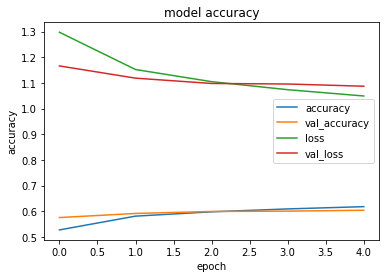

In [22]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy', 'loss', 'val_loss'])
plt.show()

In [23]:
# model_path = 'model/{}_epoch_{}'.format(model_name, epochs)
# model = kashgari.utils.load_model(model_path)
# model.evaluate(test_x, test_y)

In [24]:
test_df = test_df.merge(text_df, left_on='tweet_id', right_on='tweet_id')
# test_df

In [25]:
text_list = test_df['token'].tolist()
# text_list

In [ ]:
%%time
predict_list = model.predict(text_list)
# predict_list

2020-12-04 22:44:07,196 [DEBUG] kashgari - predict input shape (2, 411972, 113) x: 
(array([[ 101, 1045, 1005, ...,    0,    0,    0],
       [ 101, 2053, 3809, ...,    0,    0,    0],
       [ 101, 2559, 2005, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 2074, ...,    0,    0,    0],
       [ 101, 3713, 2069, ...,    0,    0,    0],
       [ 101, 2113, 2054, ...,    0,    0,    0]], dtype=int32), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32))


In [ ]:
test_df['predict'] = predict_list
# test_df

In [ ]:
output_df = test_df[['tweet_id', 'predict']]
output_df = output_df.rename(columns={'tweet_id':'id', 'predict':'emotion'})
# output_df

In [ ]:
output_path = 'output/{}-epoch-{}.csv'.format(model_name, epochs)
output_df.to_csv(output_path, index=False, header=True)